## Huffman Coding
A simple implementation of the Huffman coding algorithm for lossless data compression

In [58]:
import graphviz
import rich
from rich.console import Console
from rich.table import Table

### Creating the frequency table
In this section, we will use this quote from Yoda as our sample data and generate a frequency table based on the occurrence of each character in the quote.

In [59]:
quote = "Fear is the path to the dark side. Fear leads to anger. Anger leads to hate. Hate leads to suffering."

def create_table():
    # Add Table
    table = Table(title="Frequency Table")
    table.add_column("Character", justify="center", style="cyan", no_wrap=True)
    table.add_column("Count", justify="center", style="magenta")
    return table

table = create_table()
console = Console()
graph = graphviz.Graph()

In [60]:
def count_characters():
    freq = {}
    for char in quote:
        lower = char.lower()
        if lower not in freq:
            freq[lower] = 1
        else:
            freq[lower] = freq[lower] + 1
    
    return freq

freq = count_characters()

# sort dictionary
sort_orders = sorted(freq.items(), key=lambda x: x[1])

# add characters to table
for item in sort_orders:
    table.add_row(item[0], str(item[1]))

# display table
console.print(table)

### Generating the priority queue
Here we'll populate a priority queue where we'll store each node of the tree. The nodes will be represented by the `PItem` class which holds the priority (aka frequency) long with it's associated character(s).

In [61]:
from queue import PriorityQueue
from dataclasses import dataclass, field
from typing import Any,Optional

# data structure to hold queue items
@dataclass(order=True)
class PItem:
    priority: int
    item: Optional[Any] = field(compare=False)

# populate queue with items
def create_priority_queue(freq: dict):
    pq = PriorityQueue()
    for k,v in freq.items():        
        pq.put(PItem(v, k))
    return pq

pq = create_priority_queue(freq)

### Drawing the binary tree
Using the generated priority queue and the [graphviz](https://github.com/xflr6/graphviz) package, we'll generate a diagram to visualize the distribution of frequencies for the resultant binary tree. 

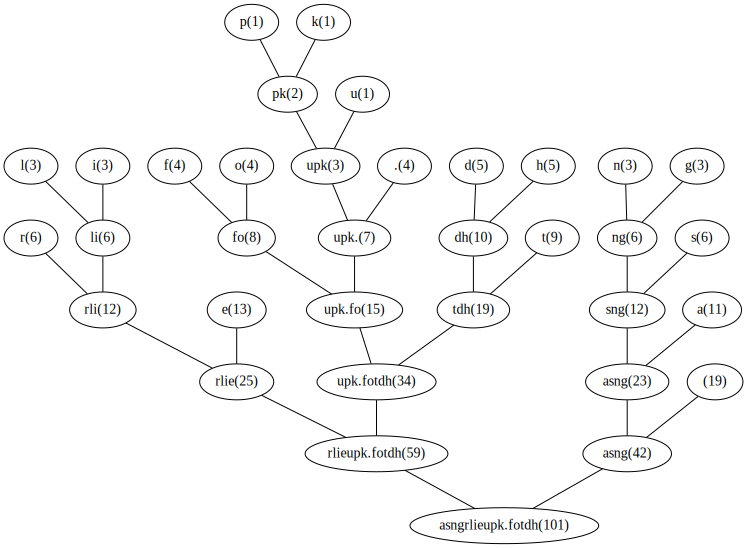

In [66]:
while pq.qsize() > 1:
    item1 = pq.get()
    item2 = pq.get()
        
    new_item = PItem(item1.priority + item2.priority, item1.item + item2.item)

    # draw graph edges
    graph.edge(f'{item1.item}({item1.priority})',f'{new_item.item}({new_item.priority})')
    graph.edge(f'{item2.item}({item2.priority})',f'{new_item.item}({new_item.priority})')
    
    pq.put(new_item)

graph